In [1]:
import matplotlib.pyplot as plt
import numpy as np

First generate our data. We generate a high framerate and a low framerate sequence for comparison.

In [2]:
minima_location = 0.15

In [6]:
def intensity_function(t, I_0, I_1, I_2):
    return I_0 + I_1 * t + I_2 * t**2 + np.sin(t)

def quadratic(t, I_0, I_1, I_2):
    return I_0 + I_1 *t + I_2 * t**2

ts_lf = np.linspace(0, 1, 6)
ts_hf = np.linspace(0, 1, 1000)
I_0 = 1
I_1 = 1
I_2 = 1
reference_frames_lf = intensity_function(ts_lf, I_0, I_1, I_2)
reference_frames_lf = reference_frames_lf# + np.random.normal(0, 10, reference_frames_lf.shape[0])
reference_frames_hf = intensity_function(ts_hf, I_0, I_1, I_2)
frame = intensity_function(minima_location, I_0, I_1, I_2)

print(reference_frames_lf)

[1.         1.43866933 1.94941834 2.52464247 3.15735609 3.84147098]


6


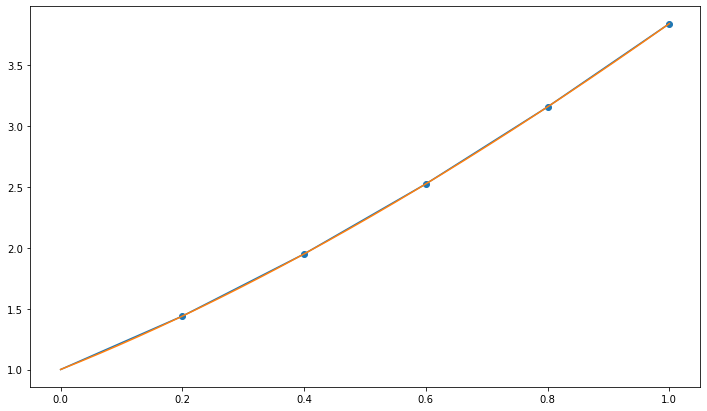

[0.98035975 2.14058213 0.72182367]


In [7]:
diffs = []
print(reference_frames_lf.shape[0])
for i in range(1, reference_frames_lf.shape[0]):
    diffs.append(reference_frames_lf[i] - reference_frames_lf[i - 1])
cs = np.cumsum(diffs)
plt.figure(figsize = (12, 7))
plt.scatter(ts_lf[1::], cs + reference_frames_lf[0])
plt.plot(ts_lf, reference_frames_lf)
plt.plot(ts_hf, reference_frames_hf)
plt.show()

from scipy.optimize import curve_fit
# TODO: Replace this with a 3 point estimator - faster and locally more accurate
popt, pcov = curve_fit(quadratic, ts_lf[1::], cs + reference_frames_lf[0])
I_0_est, I_1_est, I_2_est = popt
print(popt)

Next we get our SAD arrays

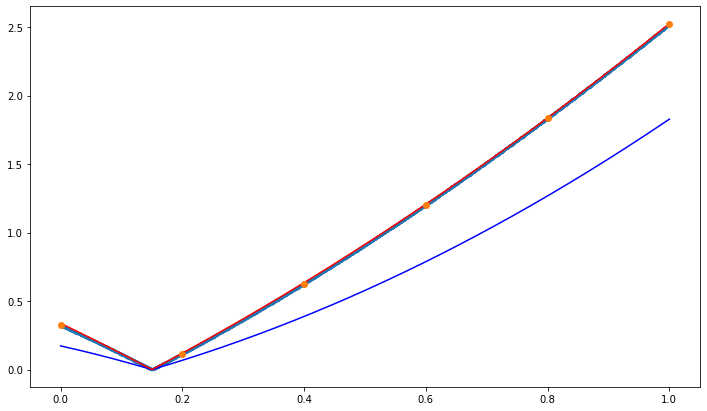

In [8]:
diffs_hf = []
for reference_frame in reference_frames_hf:
    diffs_hf.append(np.abs(reference_frame - frame))

diffs_lf = []
for reference_frame in reference_frames_lf:
    diffs_lf.append(np.abs(reference_frame - frame))

plt.figure(figsize = (12, 7))
plt.scatter(ts_hf, diffs_hf, s = 5)
plt.scatter(ts_lf, diffs_lf, zorder = 10)
plt.plot(ts_hf, np.abs(I_1 * (ts_hf - minima_location) + I_2 * (ts_hf**2 - minima_location**2)), c = "blue")
plt.plot(ts_hf, np.abs(I_1_est * (ts_hf - minima_location) + I_2_est * (ts_hf**2 - minima_location**2)), c = "red")
#plt.xlim(0.45, 0.55)
#plt.ylim(-0.1, 1)
plt.show()